In [1]:
from google.colab import files
a ,b, c = files.upload(),files.upload(),files.upload()

Saving test.csv to test.csv


Saving test_tgt.csv to test_tgt.csv


Saving train.csv to train.csv


In [2]:
d = files.upload()

Saving train_tgt.csv to train_tgt.csv


In [3]:
import pandas as pd
train,train_tgt,test,test_tgt = pd.read_csv('/content/train.csv'),pd.read_csv('/content/train_tgt.csv'),pd.read_csv('/content/test.csv'),pd.read_csv('/content/test_tgt.csv')

In [4]:
from sklearn.model_selection import StratifiedKFold

In [5]:
train.columns

Index(['koi_score', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [6]:
folds = StratifiedKFold(n_splits = 4)
from sklearn.ensemble import RandomForestClassifier
train.drop(columns = ['koi_score'],inplace = True)
for folds,(t_idx,val_idx) in enumerate(folds.split(train,train_tgt)):
  X_train,Y_train,X_test,Y_test = train.iloc[t_idx],train_tgt.iloc[t_idx],train.iloc[val_idx],train_tgt.iloc[val_idx]
  rf = RandomForestClassifier(n_estimators= 120,criterion = 'gini',n_jobs= -1)
  rf.fit(X_train,Y_train)
  print(rf.score(X_test,Y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8872517616912236


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8750800768737989


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8865384615384615


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8801282051282051


In [7]:
rf = RandomForestClassifier(n_estimators= 120,criterion = 'gini',n_jobs= -1)

In [8]:
rf.fit(train,train_tgt)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=120, n_jobs=-1)

In [9]:
test.drop(columns = ['koi_score'],inplace = True)

In [10]:
rf.score(test,test_tgt)

0.8840486867392697

In [11]:
import joblib

# Save your model to a file
joblib.dump(rf, "my_random_forest.pkl")

['my_random_forest.pkl']

In [12]:
from google.colab import files
files.download("my_random_forest.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import matplotlib.pyplot as plt

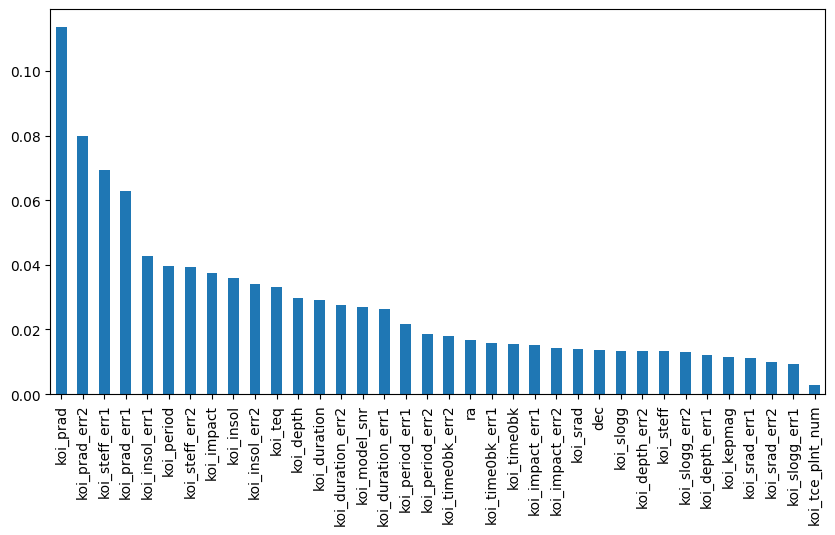

In [14]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)

# Sort and plot
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.show()